In [2]:
import pandas as pd

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt

import numpy as np
import sys
import os
from collections import defaultdict

import re
from nltk.tokenize import sent_tokenize,word_tokenize

import datetime

import seaborn as sns

In [3]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

In [4]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

In [5]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',

'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',

'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols,

encoding='latin-1')

In [6]:
print(users.shape)

users.head(10)

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
print(ratings.shape)

ratings.head(10)

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [8]:
print(items.shape)

items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')

ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [10]:
n_users = ratings.user_id.unique().shape[0]

n_items = ratings.movie_id.unique().shape[0]


In [11]:
#data matrix for users-movie items
data_matrix = np.zeros((n_users,n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1,line[2]-1]=line[3]
print(data_matrix)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [12]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [13]:
pd.DataFrame(data_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
itemsim_matrix=pd.DataFrame(item_similarity)

In [15]:
itemsim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.597618,0.669755,0.545062,0.713286,0.883656,0.379021,0.518886,0.503712,0.726065,...,0.964613,1.0,1.000000,1.000000,0.964613,1.0,1.0,1.0,0.952817,0.952817
1,0.597618,0.000000,0.726931,0.497429,0.681164,0.916437,0.616597,0.662998,0.744748,0.828918,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.921701,0.921701
2,0.669755,0.726931,0.000000,0.675134,0.787043,0.893278,0.627079,0.799206,0.726331,0.841896,...,1.000000,1.0,1.000000,1.000000,0.967708,1.0,1.0,1.0,1.000000,0.903125
3,0.545062,0.497429,0.675134,0.000000,0.665761,0.909692,0.510717,0.509764,0.580956,0.747439,...,1.000000,1.0,0.905978,0.905978,0.962391,1.0,1.0,1.0,0.943587,0.924782
4,0.713286,0.681164,0.787043,0.665761,0.000000,0.962701,0.665231,0.740839,0.727552,0.944547,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.905789


In [16]:
usersim_matrix=pd.DataFrame(user_similarity)
usersim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.833069,0.952540,0.935642,0.621525,0.569761,0.559633,0.680928,0.921862,0.623456,...,0.630473,0.880518,0.725124,0.810295,0.802674,0.881905,0.685928,0.851383,0.820492,0.601825
1,0.833069,0.000000,0.889409,0.821879,0.927021,0.754157,0.892672,0.896656,0.838952,0.840138,...,0.843014,0.692058,0.641211,0.575954,0.680111,0.771417,0.773210,0.838515,0.827732,0.894202
2,0.952540,0.889409,0.000000,0.655849,0.978755,0.927585,0.933863,0.916940,0.938960,0.934849,...,0.968125,0.957247,0.836171,0.930962,0.875755,0.973729,0.838110,0.898757,0.866584,0.973444
3,0.935642,0.821879,0.655849,0.000000,0.968196,0.931956,0.908770,0.811940,0.898716,0.939141,...,0.947893,0.963216,0.866885,0.806529,0.853942,0.969862,0.803142,0.847959,0.829914,0.941248
4,0.621525,0.927021,0.978755,0.968196,0.000000,0.762714,0.626400,0.751070,0.943153,0.798573,...,0.661206,0.919420,0.905076,0.920221,0.851393,0.928541,0.760045,0.860405,0.847503,0.686059


In [17]:
itemsim_matrix[:10].head(10)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.597618,0.669755,0.545062,0.713286,0.883656,0.379021,0.518886,0.503712,0.726065,...,0.964613,1.000000,1.000000,1.000000,0.964613,1.0,1.0,1.0,0.952817,0.952817
1,0.597618,0.000000,0.726931,0.497429,0.681164,0.916437,0.616597,0.662998,0.744748,0.828918,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.921701,0.921701
2,0.669755,0.726931,0.000000,0.675134,0.787043,0.893278,0.627079,0.799206,0.726331,0.841896,...,1.000000,1.000000,1.000000,1.000000,0.967708,1.0,1.0,1.0,1.000000,0.903125
3,0.545062,0.497429,0.675134,0.000000,0.665761,0.909692,0.510717,0.509764,0.580956,0.747439,...,1.000000,1.000000,0.905978,0.905978,0.962391,1.0,1.0,1.0,0.943587,0.924782
4,0.713286,0.681164,0.787043,0.665761,0.000000,0.962701,0.665231,0.740839,0.727552,0.944547,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.905789
5,0.883656,0.916437,0.893278,0.909692,0.962701,0.000000,0.860383,0.916124,0.848936,0.796903,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
6,0.379021,0.616597,0.627079,0.510717,0.665231,0.860383,0.000000,0.576485,0.472538,0.681377,...,1.000000,0.948502,1.000000,1.000000,0.948502,1.0,1.0,1.0,0.948502,0.948502
7,0.518886,0.662998,0.799206,0.509764,0.740839,0.916124,0.576485,0.000000,0.575571,0.732236,...,1.000000,0.917967,0.934373,0.934373,0.917967,1.0,1.0,1.0,0.917967,1.000000
8,0.503712,0.744748,0.726331,0.580956,0.727552,0.848936,0.472538,0.575571,0.000000,0.711486,...,1.000000,1.000000,0.942640,0.942640,0.928300,1.0,1.0,1.0,0.942640,0.928300
9,0.726065,0.828918,0.841896,0.747439,0.944547,0.796903,0.681377,0.732236,0.711486,0.000000,...,1.000000,1.000000,0.919736,0.919736,1.000000,1.0,1.0,1.0,1.000000,1.000000


C:\Users\24684\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


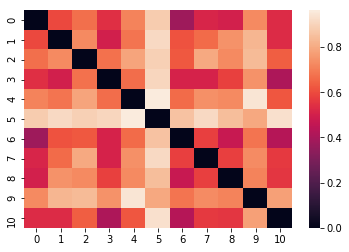

In [18]:
sns.heatmap(itemsim_matrix.ix[:10,:10])

C:\Users\24684\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


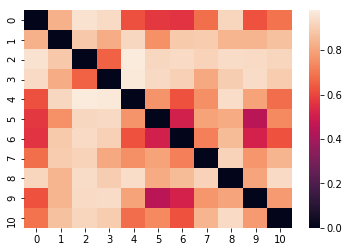

In [19]:
sns.heatmap(usersim_matrix.ix[:10,:10])

In [20]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred 

In [21]:
rsort=ratings.sort_values(by="movie_id",ascending=True)

In [22]:
#mean for each movie_id
df1=rsort.loc[:,'movie_id':'rating'].groupby(['movie_id']).mean()
df1=df1.rename(columns={"rating":"mean"})

In [23]:
#count for each movie_id
df2=rsort.loc[:,'movie_id':'rating'].groupby(['movie_id']).count()
df2=df2.rename(columns={"rating":"rating times"})

In [24]:
#median for each movie_id
df3=rsort.loc[:,'movie_id':'rating'].groupby(['movie_id']).median()
df3=df3.rename(columns={"rating":"median"})

In [93]:
df=pd.concat([df2,df1,df3],axis=1).reset_index()
#df=df.sort_values(by="rating times",ascending=False)


In [26]:
#
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

#define Matrix Factorazation #

In [27]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
        self.sgd()
        mse = self.mse()
        training_process.append((i, mse))
        if (i+1) % 20 == 0:
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [28]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [ ]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())


#Original Ratings Matrix#

In [30]:
pd.DataFrame(data_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#MF_result matrix#

In [148]:
mf_result=pd.DataFrame(mf.full_matrix())
mf_result

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,3.660683,3.479266,3.483822,3.562030,3.521067,3.552124,3.628735,3.642106,3.616503,3.565443,...,3.559991,3.568595,3.531496,3.557162,3.543611,3.545190,3.549499,3.494815,3.548124,3.535854
1,3.674022,3.512871,3.503727,3.558371,3.516305,3.538598,3.636970,3.608124,3.649157,3.589655,...,3.514756,3.551923,3.538366,3.513637,3.542181,3.532281,3.510142,3.547434,3.523533,3.533441
2,3.618764,3.452388,3.440905,3.489284,3.461316,3.502353,3.577216,3.573552,3.585796,3.519595,...,3.503265,3.495004,3.482740,3.506164,3.494782,3.492062,3.510361,3.458921,3.489501,3.493893
3,3.679855,3.500233,3.538975,3.538384,3.538123,3.556436,3.635282,3.641938,3.640437,3.586556,...,3.530441,3.543571,3.569933,3.545962,3.534038,3.546609,3.541658,3.560329,3.587077,3.555758
4,3.568553,3.393408,3.369163,3.435799,3.395657,3.406714,3.508639,3.529188,3.532368,3.443096,...,3.416593,3.432094,3.416873,3.416029,3.425036,3.406332,3.407521,3.411869,3.416712,3.435200
5,3.673109,3.512524,3.489547,3.549206,3.512185,3.553388,3.630664,3.627305,3.638162,3.571701,...,3.541381,3.552107,3.546364,3.567420,3.557518,3.544321,3.555029,3.525568,3.543201,3.533810
6,3.801852,3.638176,3.626495,3.666622,3.671036,3.667140,3.747766,3.785746,3.758068,3.669937,...,3.668830,3.655262,3.674661,3.654429,3.667380,3.664493,3.663202,3.712928,3.667521,3.678924
7,3.692691,3.486117,3.508203,3.553609,3.519275,3.548008,3.635766,3.650107,3.649094,3.573849,...,3.536879,3.550663,3.538698,3.536842,3.551471,3.529140,3.534545,3.535380,3.567996,3.562916
8,3.675845,3.499752,3.505214,3.545134,3.518678,3.580091,3.622749,3.648117,3.632254,3.591414,...,3.533588,3.556903,3.541832,3.530656,3.557544,3.563385,3.575760,3.538357,3.577519,3.553876
9,3.765753,3.589194,3.589325,3.647288,3.615856,3.642711,3.718920,3.727570,3.724054,3.660659,...,3.646768,3.655693,3.640290,3.639780,3.632737,3.643587,3.645772,3.618182,3.644081,3.641925


In [159]:
ratings.sort_values(by='rating',ascending=False)[(ratings["rating"]>3)]

C:\Users\24684\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,movie_id,rating,unix_timestamp
28336,64,183,5,889737914
16000,213,121,5,878870940
28426,286,707,5,877531975
38655,94,518,5,891720950
16022,108,10,5,879879834
16021,331,81,5,877196702
38654,363,172,5,891495711
91519,617,192,5,883788900
46578,694,199,5,875728435
84851,801,332,5,890332719


#All ratings by User_id which above 4 stars#

In [160]:
a=ratings.sort_values(by='rating',ascending=False).loc[:,"movie_id"].tolist()

print(len(a))
a

163


C:\Users\24684\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[196,
 86,
 207,
 100,
 198,
 224,
 50,
 190,
 57,
 91,
 172,
 181,
 178,
 165,
 87,
 129,
 176,
 59,
 169,
 15,
 89,
 166,
 111,
 124,
 269,
 32,
 223,
 109,
 42,
 55,
 19,
 270,
 154,
 13,
 216,
 191,
 9,
 170,
 246,
 82,
 127,
 235,
 174,
 221,
 60,
 177,
 152,
 1,
 96,
 258,
 81,
 204,
 6,
 45,
 113,
 173,
 253,
 168,
 268,
 171,
 202,
 48,
 114,
 16,
 228,
 197,
 64,
 93,
 137,
 14,
 183,
 44,
 208,
 115,
 12,
 119,
 108,
 150,
 195,
 242,
 175,
 182,
 257,
 144,
 106,
 25,
 7,
 79,
 251,
 66,
 162,
 77,
 58,
 95,
 46,
 192,
 43,
 238,
 156,
 199,
 236,
 193,
 250,
 184,
 157,
 210,
 163,
 128,
 248,
 23,
 39,
 230,
 65,
 241,
 203,
 267,
 28,
 186,
 98,
 134,
 132,
 121,
 80,
 56,
 84,
 265,
 61,
 20,
 33,
 160,
 90,
 222,
 47,
 227,
 212,
 151,
 51,
 209,
 107,
 229,
 72,
 185,
 206,
 76,
 194,
 239,
 123,
 133,
 75,
 256,
 3,
 234,
 22,
 88,
 52,
 135,
 187,
 161,
 214,
 249,
 146,
 18,
 68]

In [136]:
list1=[]
for i in range(1,944):
    
    a=len(ratings[(ratings["rating"]>3)&(ratings["user_id"]==i)].loc[:,"movie_id"].tolist())
    list1.extend([a])


In [153]:
user_id=range(1,944)
user_high_ratings=pd.DataFrame({'user_id':user_id,'high ratings':list1})
user_high_ratings.sort_values('high ratings',ascending=False)

,user_id,high ratings
942,943,378
941,942,322
940,941,280
939,940,274
938,939,274
937,938,269
936,937,260
935,936,257
934,935,257
933,934,257


In [154]:
user_high_ratings.describe()

,user_id,high ratings
count,943.000000,943.000000
mean,472.000000,58.722163
std,272.364951,54.701130
min,1.000000,0.000000
25%,236.500000,19.000000
50%,472.000000,39.000000
75%,707.500000,80.500000
max,943.000000,378.000000


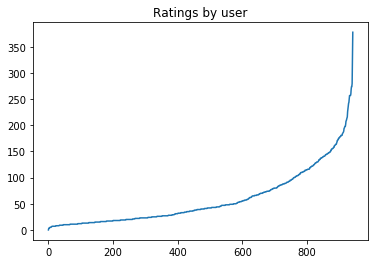

In [146]:
list1.sort()
plt.title('Ratings by user')
plt.plot(list1)



#prediction by MF#

In [77]:
b=pd.DataFrame(mf_result.iloc[0,:]).sort_values(by=0,ascending=False).head(163).index.values.tolist()
b

[49,
 173,
 97,
 126,
 99,
 317,
 63,
 11,
 171,
 312,
 482,
 356,
 180,
 55,
 172,
 602,
 21,
 301,
 190,
 167,
 78,
 426,
 88,
 479,
 95,
 473,
 186,
 133,
 131,
 510,
 271,
 182,
 196,
 68,
 209,
 274,
 181,
 0,
 184,
 179,
 478,
 27,
 168,
 514,
 193,
 653,
 22,
 237,
 407,
 257,
 222,
 194,
 495,
 7,
 526,
 198,
 268,
 422,
 650,
 134,
 656,
 207,
 177,
 284,
 654,
 195,
 13,
 434,
 215,
 527,
 474,
 497,
 708,
 483,
 264,
 6,
 123,
 152,
 208,
 169,
 82,
 143,
 199,
 513,
 203,
 314,
 116,
 175,
 210,
 512,
 8,
 315,
 587,
 85,
 191,
 136,
 227,
 267,
 10,
 178,
 256,
 1038,
 477,
 704,
 189,
 185,
 233,
 481,
 192,
 96,
 683,
 47,
 519,
 174,
 518,
 427,
 245,
 14,
 113,
 735,
 128,
 522,
 70,
 201,
 204,
 691,
 41,
 646,
 530,
 94,
 316,
 155,
 632,
 59,
 658,
 299,
 275,
 1018,
 297,
 236,
 431,
 660,
 484,
 662,
 486,
 202,
 241,
 647,
 429,
 488,
 164,
 706,
 529,
 1006,
 511,
 509,
 282,
 962,
 433,
 428,
 281,
 135,
 442]

#All True postive predictions#

In [169]:
ret1=[x for x in b if x in a]
len(ret1)
ret1

[173,
 171,
 55,
 172,
 190,
 88,
 95,
 186,
 133,
 182,
 196,
 68,
 209,
 181,
 184,
 168,
 193,
 22,
 257,
 222,
 194,
 7,
 198,
 268,
 134,
 207,
 177,
 195,
 13,
 6,
 123,
 152,
 208,
 169,
 82,
 199,
 203,
 175,
 210,
 191,
 227,
 267,
 178,
 256,
 185,
 192,
 96,
 47,
 174,
 14,
 113,
 128,
 204,
 59,
 236,
 202,
 241,
 135]

#Mean reciprocal_rank#

In [163]:
r=np.where(np.asarray(b)==ret1[0])[0]

print("MRR=",1/(r+1))

MRR= [0.5]


#Precsion@K#

In [208]:
k=19
list3=[]
list4=ratings.sort_values(by='rating',ascending=False).reset_index(drop=True)
for i in range(1,944):
    original_klist=list4[(list4["rating"]>3)&(list4["user_id"]==1)].loc[:,"movie_id"].tolist()
    predict_klist=pd.DataFrame(mf_result.iloc[i-1,:]).sort_values(by=i-1,ascending=False).head(k).index.tolist()
    ret2=[x for x in original_klist if x in predict_klist]
    list3.extend([len(ret2)/19])
print(np.mean(list3))

0.25277669252665064


In [210]:
pd.DataFrame({'userID':user_id,'Precsion@K':list3})

,userID,Precsion@K
0,1,0.263158
1,2,0.263158
2,3,0.210526
3,4,0.263158
4,5,0.263158
5,6,0.263158
6,7,0.263158
7,8,0.263158
8,9,0.315789
9,10,0.263158


average_precision

In [213]:
list5=[]
for i in range(1,944):
    original_klist=list4[(list4["rating"]>3)&(list4["user_id"]==1)].loc[:,"movie_id"].tolist()
    predict_klist=pd.DataFrame(mf_result.iloc[i-1,:]).sort_values(by=i-1,ascending=False).head(k).index.tolist()
    ret2=[x for x in original_klist if x in predict_klist]
    AP=0
    for i in range(len(ret2)):
        ret3=(original_klist.index(ret2[i])+1)/(predict_klist.index(ret2[i]+1))
        AP=AP+ret3
    list5.extend([AP])
list5

ValueError: 191 is not in list